# Jitter-plot: Top ten Nationalities with the highest Median Price (smaller points for better visibility)

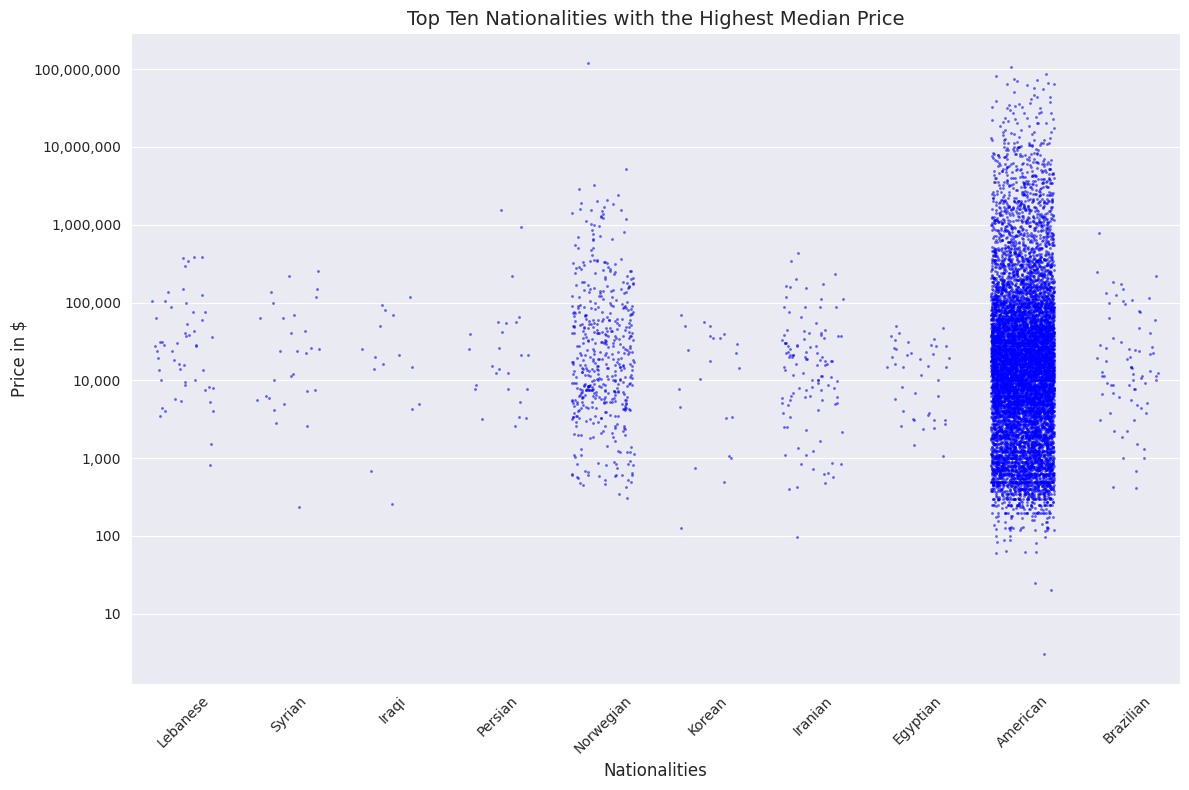

In [1]:
# Jitter Plot of the Top Ten Nationalities with the Highest Median Price (smaller Points for better visibility)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

# reading the dataset with read_csv
file_path = 'data.txt'
df = pd.read_csv(file_path, sep="\t", low_memory=False)

# We are selecting the colums 'country' and 'price'
# The dataset has missing values so we are excluding the rows with missing values
df = df[['country', 'price']].dropna()


# With country_counts we are count how man entries we have for certain countries
# country_counts is important because we are taking the median price and low
# country_counts are manipulating are results
# Our threshold is at least 10 entries for a country
country_counts = df['country'].value_counts()
valid_countries = country_counts[country_counts >= 10].index
df = df[df['country'].isin(valid_countries)]

# grouping the dataset by country and calculating the median price
median_price_per_country = df.groupby('country')['price'].median().reset_index()

# We are taking the top 10 countries with the highest median price
top_10_countries_sorted_by_median = median_price_per_country.sort_values(by='price', ascending=False).head(10)

# We need to convert our results to a python list so we can use it in our
# stripplot and also have the exact order if we dont transform it like that
# we dont get the exact same order in our jitter-plot
sorted_countries = top_10_countries_sorted_by_median['country'].tolist()

# Transforming it to a dataframe again and filter it so it only includes the top 10 countries
df_top_10_sorted_by_median = df[df['country'].isin(sorted_countries)]

# size of the plot
plt.figure(figsize=(12, 8))

# We are doing a jitter plot here
sns.stripplot(
    data=df_top_10_sorted_by_median,
    x='country',
    y='price',
    jitter=0.3, # shifting the points horizontally so the points dont overlap to much
    size=2,  # size of the points
    alpha=0.6,  # transparency of the points
    color='blue',
    order=sorted_countries
)

# log-scaling of the y-axis
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))


# labels for the x/y-axis and also the title of the plot
plt.title('Top Ten Nationalities with the Highest Median Price', fontsize=14)
plt.xlabel('Nationalities', fontsize=12)
plt.ylabel('Price in $', fontsize=12)

# rotating the names on the x-axis for better readability
plt.xticks(rotation=45)

# Just so nothing overlaps on the plot like the title, x/y-labels
plt.tight_layout()
plt.show()


# Jitter-plot: top ten Nationalities with the highest Median Price (normal size points)

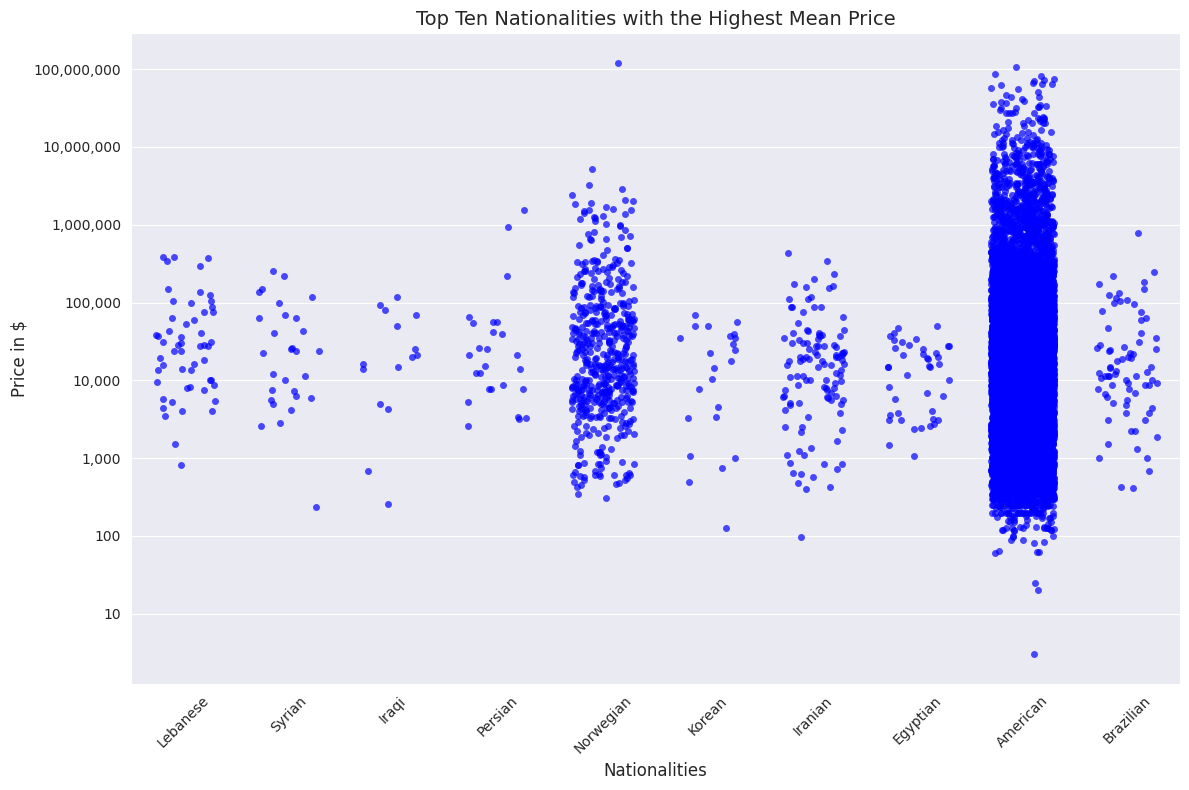

In [2]:
# Jitter Plot of the Top Ten Nationalities with the Highest Median Price

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

# reading the dataset with read_csv
file_path = 'data.txt'
df = pd.read_csv(file_path, sep="\t", low_memory=False)

# We are selecting the colums 'country' and 'price'
# The dataset has missing values so we are excluding the rows with missing values
df = df[['country', 'price']].dropna()

# With country_counts we are count how man entries we have for certain countries
# country_counts is important because we are taking the median price and low
# country_counts are manipulating are results
# Our threshold is at least 10 entries for a country
country_counts = df['country'].value_counts()
valid_countries = country_counts[country_counts >= 10].index
df = df[df['country'].isin(valid_countries)]

# grouping the dataset by country and calculating the median price
median_price_per_country = df.groupby('country')['price'].median().reset_index()

# We are taking the top 10 countries with the highest median price
top_10_countries_sorted_by_median = median_price_per_country.sort_values(by='price', ascending=False).head(10)

# We need to convert our results to a python list so we can use it in our
# stripplot and also have the exact order if we dont transform it like that
# we dont get the exact same order in our jitter-plot
sorted_countries = top_10_countries_sorted_by_median['country'].tolist()

# Transforming it to a dataframe again and filter it so it only includes the top 10 countries
df_top_10_sorted_by_median = df[df['country'].isin(sorted_countries)]

# size of the plot
plt.figure(figsize=(12, 8))

# We are doing a jitter plot here
sns.stripplot(
    data=df_top_10_sorted_by_median,
    x='country',
    y='price',
    jitter=0.3, # shifting the points horizontally so the points dont overlap to much
    size=5, # size of the points
    alpha=0.7,  # transparency of the points
    color='blue',
    order=sorted_countries
)

# log-scaling of the y-axis
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# labels for the x/y-axis and also the title of the plot
plt.title('Top Ten Nationalities with the Highest Mean Price', fontsize=14)
plt.xlabel('Nationalities', fontsize=12)
plt.ylabel('Price in $', fontsize=12)

# rotating the names on the x-axis for better readability
plt.xticks(rotation=45)

# Just so nothing overlaps on the plot like the title, x/y-labels
plt.tight_layout()
plt.show()


# Bar-chart: Top 20 nationalities with the highest Mean Price

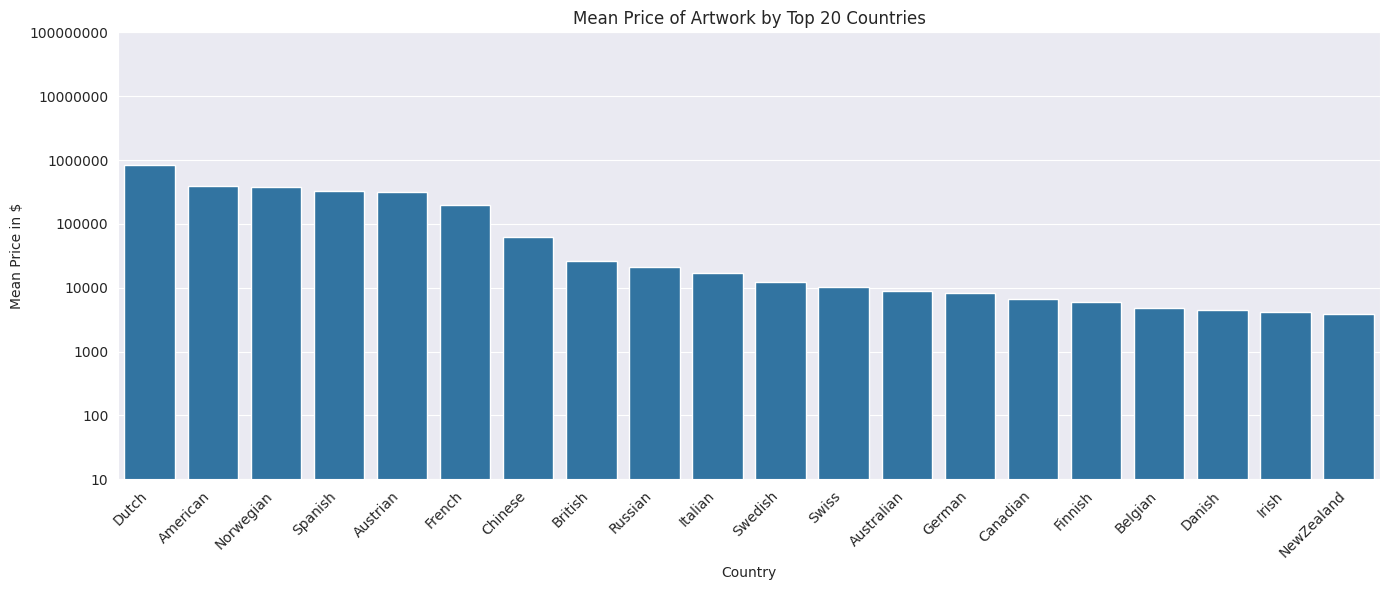

In [3]:
# bar chart with the Mean Price and the Top 20 Nationalities

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# reading the dataset with read_csv
df = pd.read_csv('data.txt', sep='\t', low_memory=False)

# Ensure 'price' is numeric (float) and 'country' is string
df_clean = df[
    df['price'].apply(lambda x: isinstance(x, (int, float))) &  # Filter numeric prices
    df['country'].apply(lambda x: isinstance(x, str))  # Filter string countries
]

# Calculate the mean price by country
mean_price_by_country = df_clean.groupby('country')['price'].mean().reset_index()

# Count the number of entries per country and get the top 20 countries
top_20_countries = df_clean['country'].value_counts().head(20).index

# Filter the mean price data to include only the top 20 countries
mean_price_top_20 = mean_price_by_country[mean_price_by_country['country'].isin(top_20_countries)]

# Sort by mean price in descending order
mean_price_top_20_sorted = mean_price_top_20.sort_values(by='price', ascending=False)

# Create the barplot
plt.figure(figsize=(14, 6))
sns.barplot(x='country', y='price', data=mean_price_top_20_sorted)

# Set the y-axis to logarithmic scale
plt.yscale('log')

# Set the y-axis ticks to display values like 10, 100, 1000, 10000, etc.
plt.yticks([10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000],
           ['10', '100', '1000', '10000', '100000', '1000000', '10000000', '100000000'])

# Set labels and title
plt.title('Mean Price of Artwork by Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Mean Price in $')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to make sure labels don't get cut off
plt.tight_layout()

# Display the plot
plt.show()

# Bar-chart: Top 20 nationalities with the highest Mean Price excluding the seven famous Artists

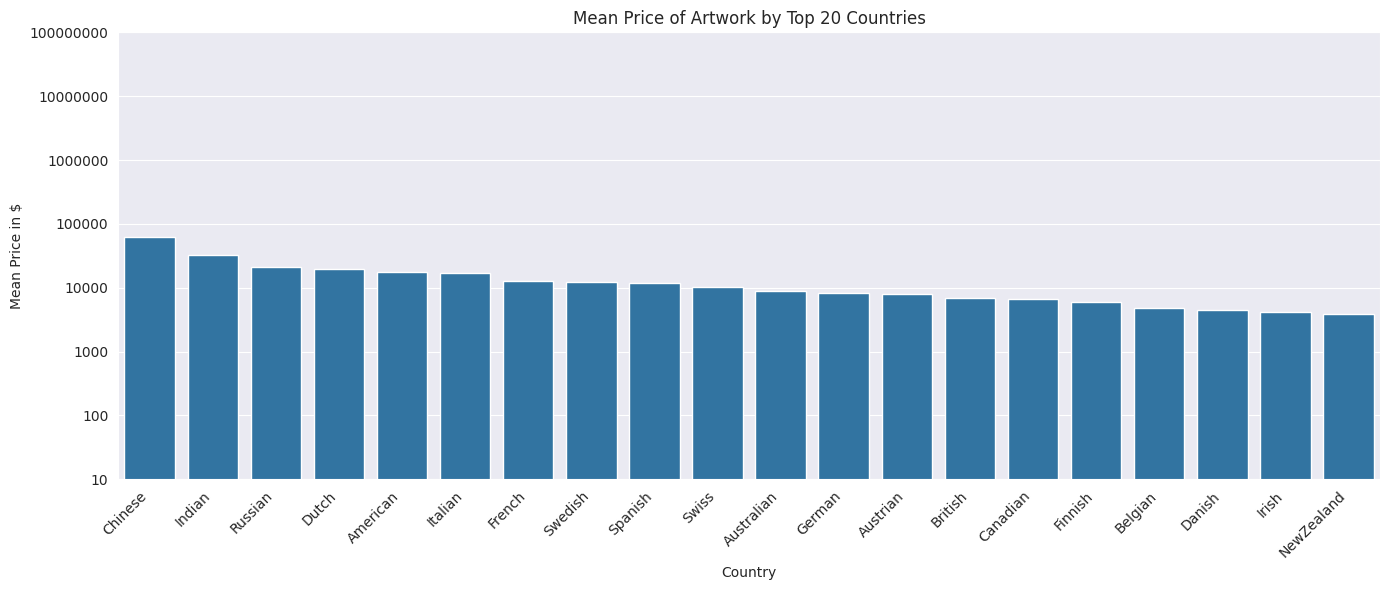

In [4]:
# bar chart with the Mean Price and the Top 20 Nationalities

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# reading the dataset with read_csv
df = pd.read_csv('data.txt', sep='\t', low_memory=False)

# List of artists to exclude
artists_to_exclude = [
    "Andy Warhol", "Mark Rothko", "Pablo Picasso", "Vincent van Gogh",
    "Gustav Klimt", "Paul Cezanne", "Francis Bacon", "Edvard Munch"
]

# Ensure 'price' is numeric (float) and 'country' is string
df_clean = df[
    ~df['artist'].isin(artists_to_exclude) &  # Exclude specific artists
    df['price'].apply(lambda x: isinstance(x, (int, float))) &  # Filter numeric prices
    df['country'].apply(lambda x: isinstance(x, str))  # Filter string countries
]

# Calculate the mean price by country
mean_price_by_country = df_clean.groupby('country')['price'].mean().reset_index()

# Count the number of entries per country and get the top 20 countries
top_20_countries = df_clean['country'].value_counts().head(20).index

# Filter the mean price data to include only the top 20 countries
mean_price_top_20 = mean_price_by_country[mean_price_by_country['country'].isin(top_20_countries)]

# Sort by mean price in descending order
mean_price_top_20_sorted = mean_price_top_20.sort_values(by='price', ascending=False)

# Create the barplot
plt.figure(figsize=(14, 6))
sns.barplot(x='country', y='price', data=mean_price_top_20_sorted)

# Set the y-axis to logarithmic scale
plt.yscale('log')

# Set the y-axis ticks to display values like 10, 100, 1000, 10000, etc.
plt.yticks([10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000],
           ['10', '100', '1000', '10000', '100000', '1000000', '10000000', '100000000'])

# Set labels and title
plt.title('Mean Price of Artwork by Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Mean Price in $')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to make sure labels don't get cut off
plt.tight_layout()

# Display the plot
plt.show()

# Scatter-plot: The Brightness in comparison to the mean price of Artworks

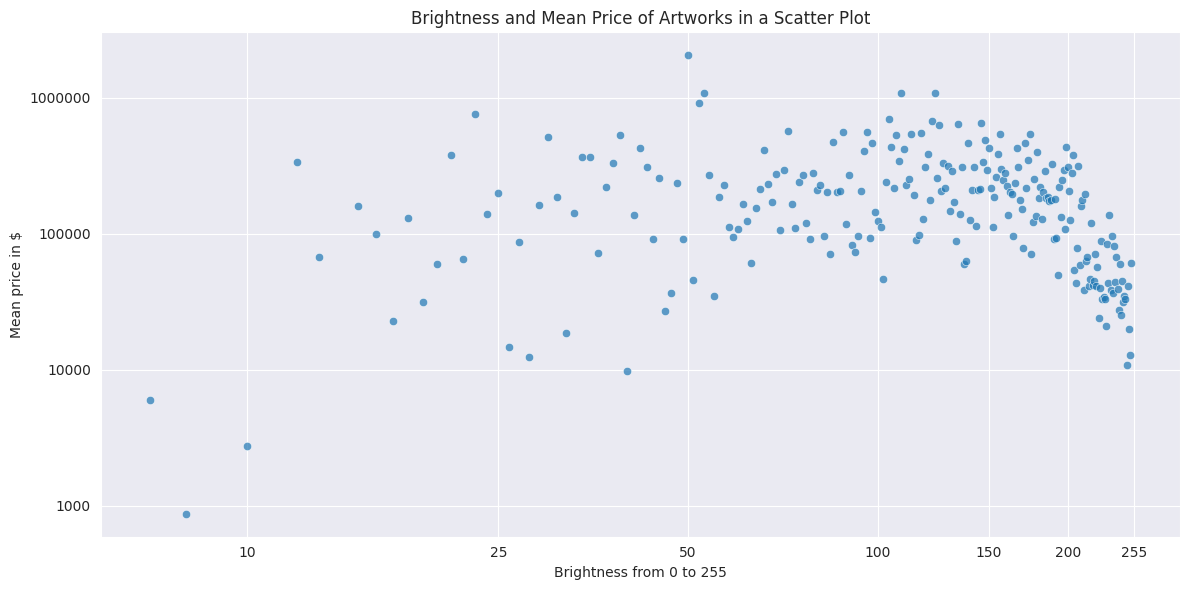

In [5]:
# scatter plot with the brightness from 0 to 255 and mean_price

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# reading the dataset with read_csv
file_path = 'data.txt'
df = pd.read_csv(file_path, sep="\t", low_memory=False)

# We are selecting the columns 'brightness' and 'price'
# The dataset has missing values so we are excluding the rows with missing values
df = df[['brightness', 'price']].dropna()

# grouping the dataset by brightness and calculating the mean price
brightness_mean_price = df.groupby('brightness')['price'].mean().reset_index()

# size of the plot
plt.figure(figsize=(12, 6))

# We are doing a scatter plot here
sns.scatterplot(data=brightness_mean_price, x='brightness', y='price', alpha=0.7)

# log-scaling of the x/y-axis
plt.xscale('log')
plt.yscale('log')

# This is for changing the visible scaling of the x/y-axis so we dont get
# 10^x on the x/y-axis
ax = plt.gca()

# We don't want to use useMathText, just regular Text for the scaling on the x/y-axis
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))

# We don't want to use scientificNotation, because for small numbers we get
# something like -10^x
ax.xaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_scientific(False)

# We are manually scaling the x-axis with this
x_ticks = [10, 25, 50, 100, 150, 200, 255]
plt.xticks(x_ticks)

# labels for the x/y-axis and also the title of the plot
plt.xlabel('Brightness from 0 to 255')
plt.ylabel('Mean price in $')
plt.title('Brightness and Mean Price of Artworks in a Scatter Plot')

# Just so nothing overlaps on the plot like the title, x/y-labels
plt.tight_layout()
plt.show()
